### PH434 Autumn 2025 – Programming Lab.

**Practical Class 7 (Dated: 03. 10. 2025)**

#### Question 1

Consider two harmonic oscillators with displacements along the $x$ and $y$ axis, respectively. Using, $m_1 = m_2 = 1$ for the two oscillators, use a ODE solver to find the displacement of the two oscillators along the $x$ and $y$ axis.

Using matplotlib, plot $x$ vs $y$ to create the Lissajous figures: a) $k_1 = 1$ and $k_2 = 1$, b) $k_1 = 1$ and $k_2 = 1/2$, and b) and $k_1 = 1$ and $k_2 = 1/4$.

#### Question 2

Solve the differential equation:

$$ \dfrac{dx_0}{dt} = \sigma(x_1-x_0) $$

$$ \dfrac{dx_1}{dt} = x_0(\rho - x_2) -  x_1 $$

$$ \dfrac{dx_2}{dt} = x_0 x_1 - \beta x_2 $$ 

where $\sigma, \rho, \beta = 5, 4, 1$, respectively. You can take the time, $t \in [0,10]$. Plot $x_0$ vs $t$, and $x_1$ vs $x_2$. You can use the initial state to be $\textbf{x} = [1,1,1]$.
 

#### Question 3

Convert the second order differential equation to a set of ODEs and solve:

$ \dfrac{d^2y}{{dt}^2} + 3 \dfrac{dy}{dt} + ty = \cos(t)$, 

where $\dfrac{dy}{dt} = y'(0) = -2$ and $y(0)=2$. 

Plot i) $y$ vs $t$ and ii) $y'$ vs $t$, for 100 values of $t$ between $0$ and $4\pi$. 
</br>

#### Question 4


Assume a hypothetical isolated island inhabited **only** by foxes and rabbits. The island is lush and full of greenery and has plenty of food for the rabbits, effectively giving them an *unlimited* food supply. The foxes on the other hand prey *exclusively* on the rabbits as they do not like eating fish from the sea. There are no other animals on the island (not even birds visit this island). Say at an instant of time $t_0$, the population density of rabbits on the island is $x$ and that of the foxes is $y$. The population dynamics on the island takes the following form:

$$\frac{dx}{dt} =  \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Here, $\alpha, \beta, \gamma, \delta$ are positive constants where $\alpha$ specifies the growth rate of the rabbits, $\beta$ specifies the rate at which the rabbits are hunted by foxes, $\gamma$ specifies the death rate of foxes due to natural causes and $\delta$ specifies the growth rate of foxes by hunting rabbits. Given $\alpha = 0.1, \beta = 0.002, \gamma = 0.2, \delta = 0.0025$, let $x(t_0) = 20 km^{-2}$ and $y(t_0) = 8 km^{-2}$. Find the change in population density of rabbits and foxes on the island within a span of **100 years**. What happens if instead of $x(t_0) = 20 km^{-2}$ and $y(t_0) = 4 km^{-2}$, one has:

(a) $x(t_0) = 20 km^{-2}$ and $y(t_0) = 0 km^{-2}$

(b) $x(t_0) = 20 km^{-2}$ and $y(t_0) = 20 km^{-2}$

(c) $x(t_0) = 0 km^{-2}$ and $y(t_0) = 8 km^{-2}$

(d) $x(t_0) = 8 km^{-2}$ and $y(t_0) = 8 km^{-2}$

(e) $x(t_0) = 8 km^{-2}$ and $y(t_0) = 20 km^{-2}$

Define a function that plots the population density (in units of per sq. km) of rabbits and foxes against time elapsed (in units of years) on the same figure for each of the 5 cases. Try to interpret the results.

<br>

### Challenge

1. The working of a dye-based, single-mode microlaser can be modelled using the following equation of motion:

$
\begin{eqnarray}
\frac{dn}{dt} &=& -\kappa n + N_{mol} E(n+1) p_e, \nonumber\\
\frac{dp_e}{dt} &=& -[\Gamma_\downarrow + E(n+1)]p_e + \Gamma_\uparrow(1-p_e),
\end{eqnarray}
$

where $n$ is the average number of photons inside the cavity, $N$ is total number of dye molecules inside the cavity, $p_e$ is the fraction of excited molecules, $E$ is the rates at which is photon emitted by the dye (absorption is assumed to be negligible), and finally $\Gamma_\uparrow$ and $\Gamma_\downarrow$ are the molecular pumping rate and molecular de-excitation rates, respectively. 

Consider the following system parameters, $N = 10^8$, with $E = 10^{-5}\kappa$, $\Gamma_\downarrow = \kappa/4$, and $\Gamma_\uparrow/\Gamma_\downarrow = 10^{-4}$.

Write a function that allows you to find the steady state photon number, $n(t)=n_{ss}$, such that $\frac{dn}{dt} = 0$ at some time $t$. Take time steps of 20 (in units of kappa), i.e., t_span = $[0,20]$. Moreover, the solution of the first time span can be taken as the initial state of the second. 


Note your function needs to check for steady state by ensuring that the photon number between two time steps change (absolute relative value) by a value smaller that $10^{-2}$ i.e., 

$
\frac{|n(t+\Delta t)-n(t+\Delta t)|}{n(t+\Delta t)} < 10^{-2}.
$


2. In the above problem, change $\Gamma_\uparrow/\Gamma_\downarrow$ in the range $[10^{-6}, 10^{-2}]$, and by plotting the steady state photon number and the $\Gamma_\uparrow$ in the log scale, show that there is driven-dissipative phase transition in the microlaser system. 

In [6]:
## Challenge Q1

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def microlaser(t,y,Gup=4*1e-4):
    Nmol=1e8
    k=1
    E=1e-5
    Gd=1/4
    n = -1*k*y[0] + Nmol*E*(y[0]+1)*y[1]
    p = -1*(Gd + E*(y[0]+1))*y[1] + Gup*(1-y[1])
    return np.array([n,p])

# Single run of the above ODE
# t = np.linspace(0,500,100)
# y_out = solve_ivp(microlaser, t_span = [0,500], y0 = np.array([0.0,0.0]), t_eval=t, args=(4*1e-6,))
# plt.plot(t,y_out.y[0])

# print (y_out.y[0])

def steady_state(func,tstep = 20,num_runs=100,g=4*1e-4):
    y_init = np.array([0.0,0.0])
    i = 0
    while i < num_runs:
        t = [0,tstep/2,tstep]
        y_out = solve_ivp(microlaser, t_span = [0,tstep], y0 = y_init, t_eval=t,args=(g,))
#         print (np.abs((y_out.y[0][-1]-y_out.y[0][-2])/y_out.y[0][-1]))
        if (np.abs((y_out.y[0][1]-y_out.y[0][0])/(y_out.y[0][0]+1e-10))) < 1e-2:
            return y_out.y[0][-1] ## Returns only the steady state problem
        else:
            y_init = np.array([y_out.y[0][-1],y_out.y[1][-1]])
        i += 1
    print ("No solutions obtained after all runs")
    
steady_state(microlaser)  

np.float64(14960.284376334092)

Text(0, 0.5, 'Steady state')

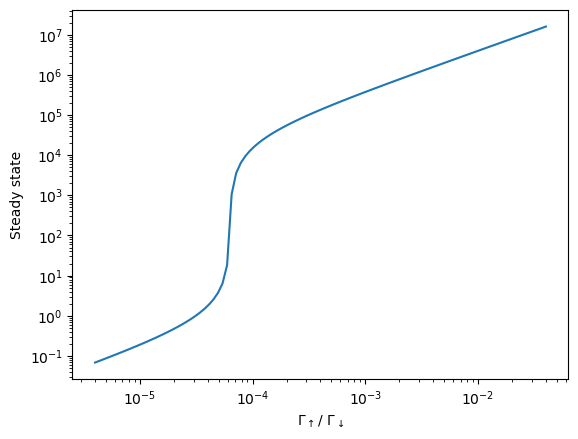

In [29]:
## Challenge Q1

G_up = 4*10**np.linspace(-6,-2,100)
Ss = [steady_state(microlaser,g=4*g) for g in G_up]
plt.loglog(G_up,Ss)
plt.xlabel(r'${\Gamma_\uparrow}/{~\Gamma_\downarrow}$')
plt.ylabel('Steady state')